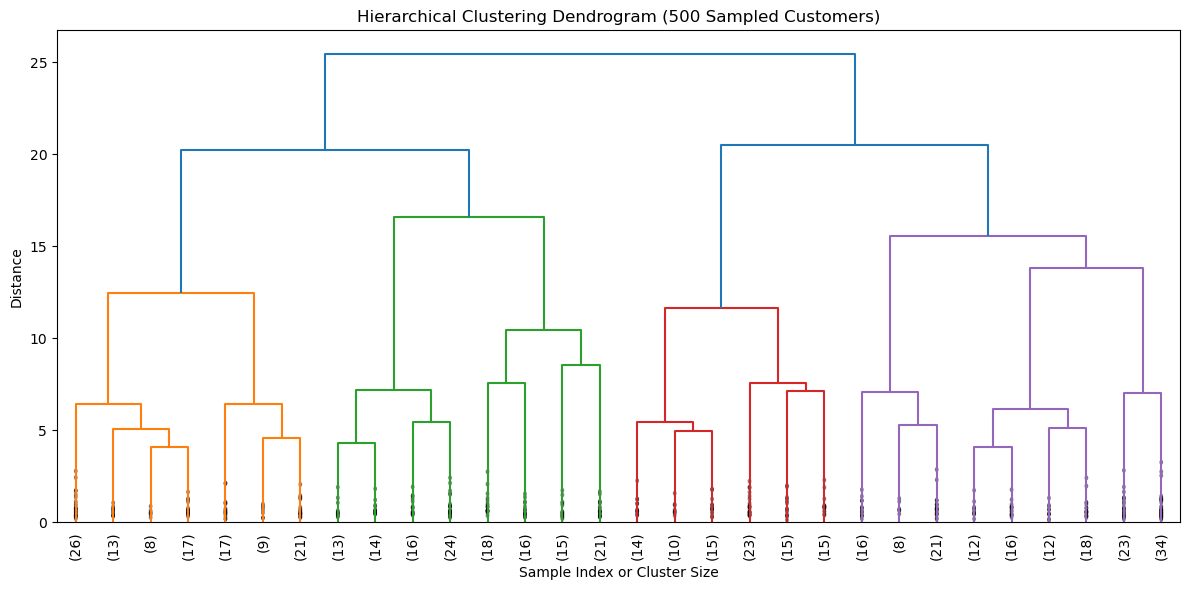

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram ,linkage
from sklearn.cluster import AgglomerativeClustering

# 📁 Load dataset
file_path = '/Users/anirudhravipudi/Desktop/AI/Practice/customer_segmentation_data.csv'
df = pd.read_csv(file_path)

# 🔢 Select numeric features
features = df[['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']]

# 🎯 Sample the data to speed up dendrogram generation
sample_size = 500  # ← Change this if needed
df_sample = df.sample(n=sample_size, random_state=42)
features_sample = df_sample[['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']]

# ⚖️ Standardize features
scaler = StandardScaler()
scaled_sample = scaler.fit_transform(features_sample)

# 🌳 Create linkage matrix for dendrogram
linked = linkage(scaled_sample, method='ward')

# 📈 Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90.,
           leaf_font_size=10., show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram (500 Sampled Customers)")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# ✅ Optional: Assign clusters (e.g., k=4)
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
df_sample['Hierarchical_Cluster'] = hc.fit_predict(scaled_sample)

# 🧾 Preview result
print(df_sample[['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 'Hierarchical_Cluster']].head())


In [7]:
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
df_sample['Hierarchical_Cluster'] = hc.fit_predict(scaled_sample)

In [9]:
print(df_sample[['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 'Hierarchical_Cluster']].head())

       Age  Income Level  Coverage Amount  Premium Amount  \
36995   37         50891           941997            3381   
2778    51        107339           748863            3396   
30309   26         36083           773961            2295   
40956   29         41122           597673             720   
27077   31        132965           658409            4443   

       Hierarchical_Cluster  
36995                     1  
2778                      1  
30309                     1  
40956                     2  
27077                     1  
